In [1]:
pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=aa1e74234efcfe3b5a83ecf76bacbec50390ce988bea3e20983e663e0a582cea
  Stored in directory: /home/thais/.cache/pip/wheels/5d/7a/54/1460364da0fe4e17c256b7a28191fa373d81292fcf73a4ddb8
Successfully built upsetplot
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# This script parses CD-HIT .clstr files to extract cluster-level database membership information. 
# For each cluster, it identifies the databases associated with the sequences based on FASTA header annotations 
# and aggregates these memberships across all cluster files. 
# The resulting data structure can be used to quantify database overlap and to generate UpSet plots

import re
from collections import defaultdict
from pathlib import Path

all_memberships = []   

for file in Path("./").glob("*.clstr"):
    clusters = defaultdict(set)
    current = None

    with open(file) as f:
        for line in f:
            line = line.strip()

            if line.startswith(">Cluster"):
                current = line.split()[1]

            elif ">" in line:
                name = re.search(r">(.*?)\.\.\.", line).group(1)
                db = name.split("_")[-1]   
                clusters[current].add(db)

    for c in clusters.values():
        all_memberships.append(c)

len(all_memberships)

4495067

In [2]:
all_memberships

[{'bv'},
 {'bv'},
 {'bv'},
 {'bv'},
 {'bv'},
 {'bv'},
 {'bv'},
 {'bv', 'refseq', 'uniprot'},
 {'bv'},
 {'bv', 'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'bv', 'refseq', 'uniprot'},
 {'bv'},
 {'bv'},
 {'bv'},
 {'bv'},
 {'bv'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'bv'},
 {'bv'},
 {'uniprot'},
 {'bv'},
 {'uniprot'},
 {'uniprot'},
 {'bv'},
 {'bv'},
 {'uniprot'},
 {'uniprot'},
 {'bv'},
 {'uniprot'},
 {'bv'},
 {'uniprot'},
 {'bv'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'bv'},
 {'uniprot'},
 {'bv'},
 {'bv', 'uniprot'},
 {'bv'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'bv'},
 {'bv', 'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {'bv'},
 {'uniprot'},
 {'uniprot'},
 {'uniprot'},
 {

In [ ]:
# Removes data from dbcan and metacyc databases 

to_remove = {"dbcan", "metacyc"}

filtered = []
for s in all_memberships:
    new = s - to_remove
    if new:            
        filtered.append(new)

/home/thais/miniconda3/lib/python3.12/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/thais/miniconda3/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inpla

<Figure size 1200x1000 with 0 Axes>

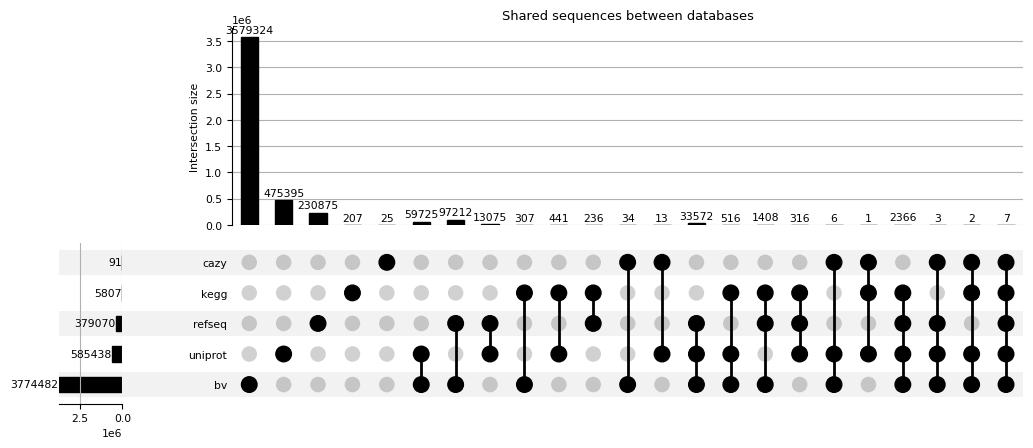

In [ ]:
# Constructing the UpSetPlot

from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt

data = from_memberships(filtered)

plt.figure(figsize=(12,10))
matplotlib.rcParams["font.size"] = 7.8
UpSet(data, show_counts=True, subset_size='count').plot()
plt.title("Shared sequences between databases")
plt.show()

/home/thais/miniconda3/lib/python3.12/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/thais/miniconda3/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inpla

<Figure size 1200x1000 with 0 Axes>

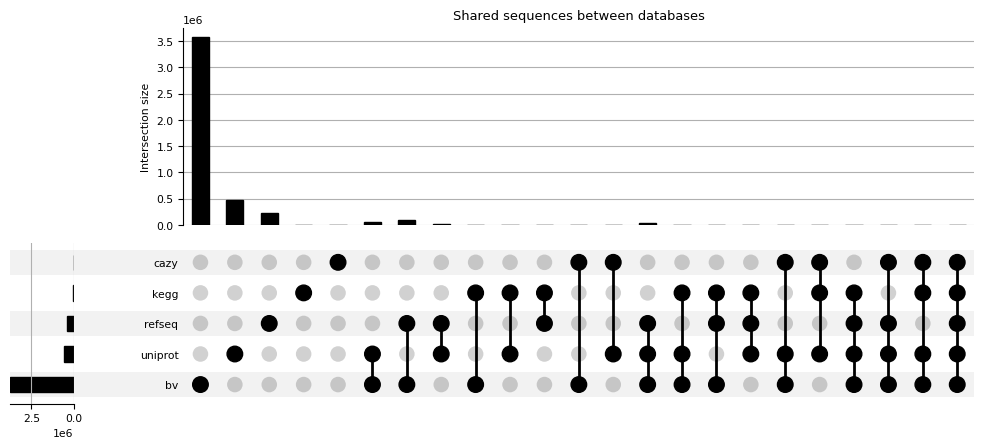

In [5]:
# Constructing the UpSetPlot

from upsetplot import from_memberships, UpSet
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt

data = from_memberships(filtered)

plt.figure(figsize=(12,10))
matplotlib.rcParams["font.size"] = 7.8
UpSet(data, show_counts=False, subset_size='count').plot()
plt.title("Shared sequences between databases")
plt.show()